# Implentation of Speech Emotion Recognition Using Deep Learning

# Import Modules

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os 
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install ipython

# Installing Librosa Library

In [3]:
#pip install librosa

In [4]:
#pip install playsound

In [5]:
#pip install audio

In [6]:
TESS = "C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data"

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split("_")[-1]
        label = label.split(".")[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break 
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
len(paths)

2800

In [9]:
paths[:5]

['C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Admin\\Desktop\\BEProject\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [10]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

# DATAFRAME

In [11]:
df = pd. DataFrame()
df['speech'] = paths
df['label'] = labels

In [12]:
df.head()

,speech,label
0,C:\Users\Admin\Desktop\BEProject\TESS Toronto ...,angry
1,C:\Users\Admin\Desktop\BEProject\TESS Toronto ...,angry
2,C:\Users\Admin\Desktop\BEProject\TESS Toronto ...,angry
3,C:\Users\Admin\Desktop\BEProject\TESS Toronto ...,angry
4,C:\Users\Admin\Desktop\BEProject\TESS Toronto ...,angry


In [13]:
df['label'].value_counts()

neutral    400
fear       400
angry      400
ps         400
happy      400
sad        400
disgust    400
Name: label, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

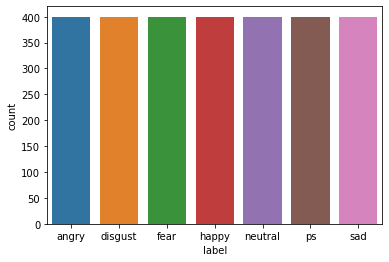

In [14]:
sns.countplot(df['label'])

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

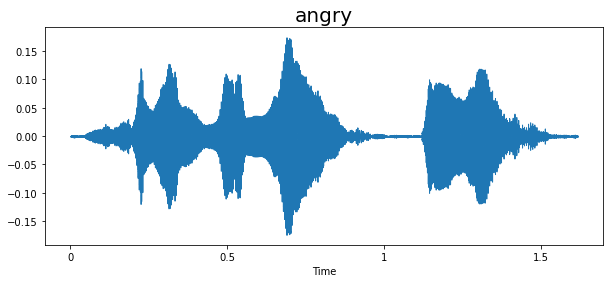

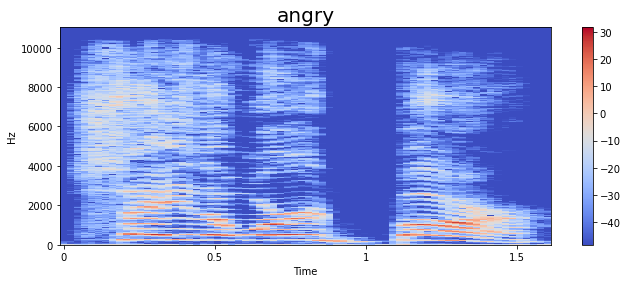

In [16]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

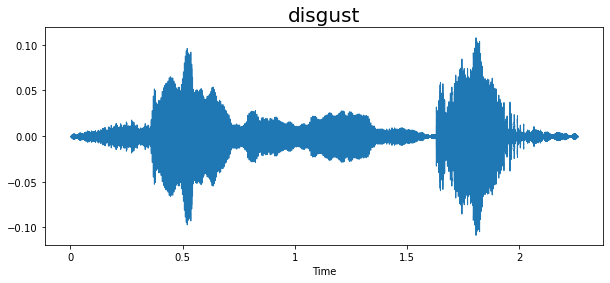

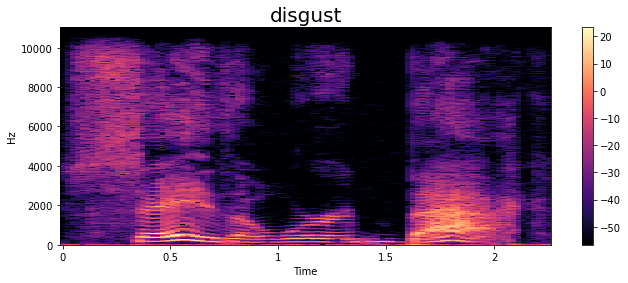

In [17]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

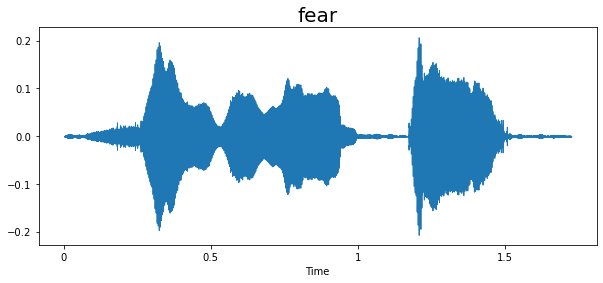

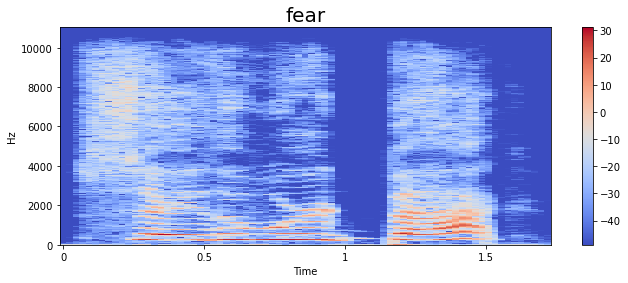

In [18]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

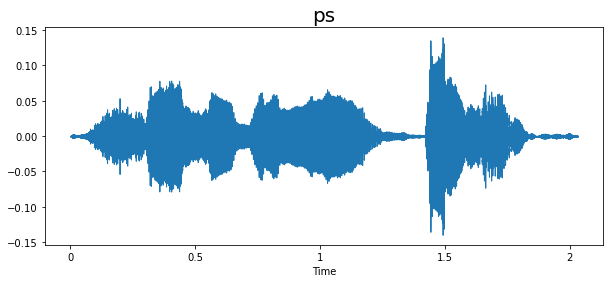

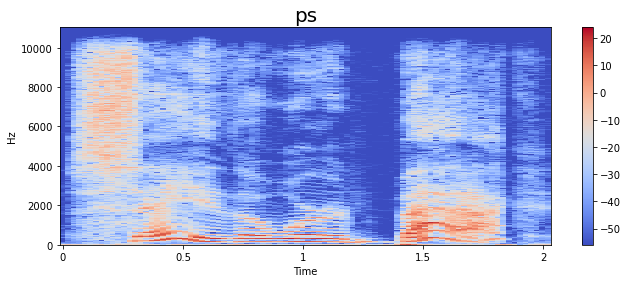

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

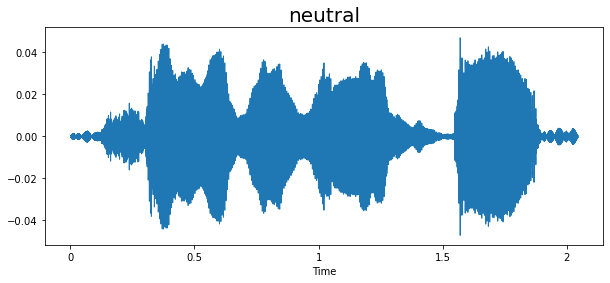

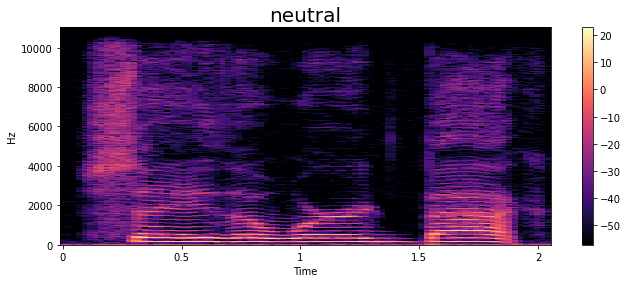

In [20]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

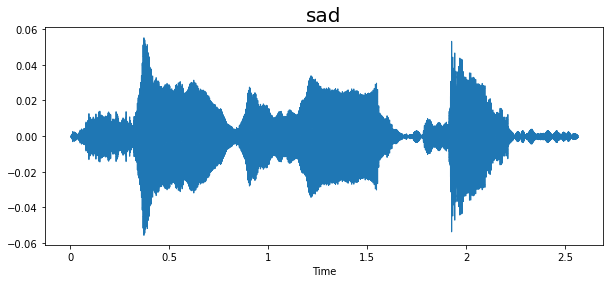

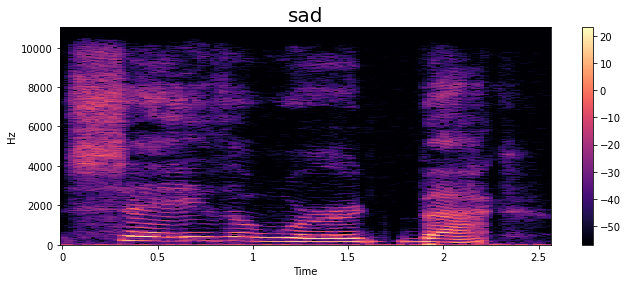

In [21]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

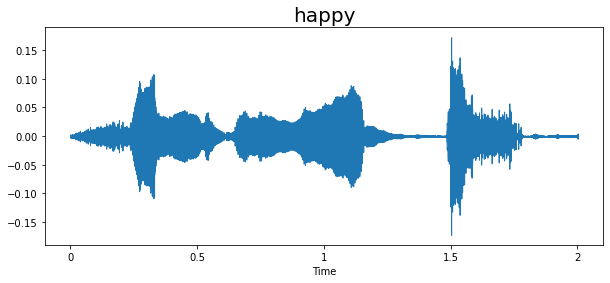

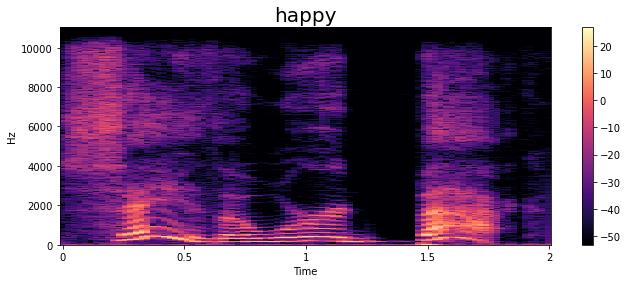

In [22]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [23]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [25]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100214e-01, -2.9795787e+00,  1.3149228e+00,
       -3.4300944e-01,  2.3402820e+00,  1.9168798e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256538e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321527e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294442e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [26]:
#pip install pyaudio

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.48027304, -31.61629...
2       [-431.5178, 48.56504, -0.89244896, 2.2234004, ...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873596, 18.061928, 6.0...
                              ...                        
2795    [-554.5794, 91.78299, 25.282017, 18.345247, 17...
2796    [-590.1003, 97.41461, 35.74892, 16.209633, 27....
2797    [-535.2709, 88.06032, 25.163685, 21.924894, 19...
2798    [-549.7413, 111.764175, 30.308115, 14.165435, ...
2799    [-550.9464, 104.709015, 29.937454, 28.579796, ...
Name: speech, Length: 2800, dtype: object

In [29]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [30]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [32]:
y = y.toarray()

In [33]:
y.shape

(2800, 7)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [35]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=54,shuffle=True)

Epoch 1/50
42/42 [==============================] - 13s 203ms/step - loss: 0.9850 - accuracy: 0.6464 - val_loss: 0.7992 - val_accuracy: 0.7321
Epoch 2/50
42/42 [==============================] - 6s 150ms/step - loss: 0.3637 - accuracy: 0.8741 - val_loss: 0.1451 - val_accuracy: 0.9714
Epoch 3/50
42/42 [==============================] - 7s 166ms/step - loss: 0.2037 - accuracy: 0.9371 - val_loss: 0.1332 - val_accuracy: 0.9554
Epoch 4/50
42/42 [==============================] - 7s 168ms/step - loss: 0.1324 - accuracy: 0.9594 - val_loss: 0.2095 - val_accuracy: 0.9286
Epoch 5/50
42/42 [==============================] - 7s 156ms/step - loss: 0.1670 - accuracy: 0.9415 - val_loss: 0.0697 - val_accuracy: 0.9679
Epoch 6/50
42/42 [==============================] - 7s 172ms/step - loss: 0.1083 - accuracy: 0.9688 - val_loss: 0.1603 - val_accuracy: 0.9464
Epoch 7/50
42/42 [==============================] - 6s 154ms/step - loss: 0.0840 - accuracy: 0.9754 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch

# Plot the results

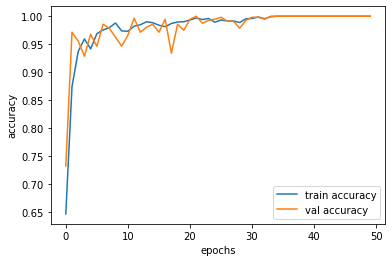

In [36]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

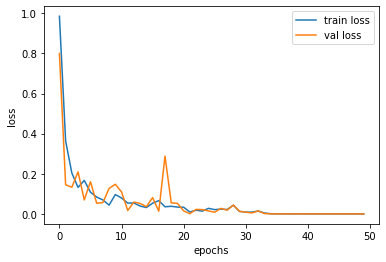

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()